# Linear regression in Tensorflow
This notebook showcases how to solve a linear regression problem using a traditional ML approach (=non-NN).


It's somewhat based on this https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/linear_regression.ipynb


Let's start with plotting some data:

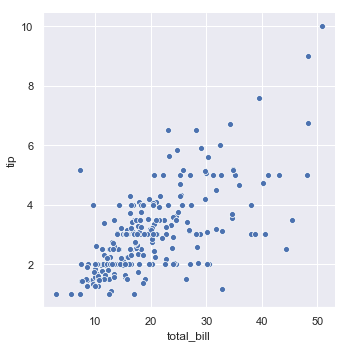

In [116]:
%matplotlib inline
import tensorflow as tf
import numpy as np
# Let's use the seaborn library to easily get some data and plot it
import seaborn as sns
sns.set()

# Load 'tips' dataset, only plot 'total_bill', and 'tip' and features (there's a bunch more features in this dataset)
tips = sns.load_dataset("tips")
plt = sns.relplot(x="total_bill", y="tip", data=tips);

Clearly there's a linear relationship between the amount of top and the total bill. Let's try to find the trend line here using linear regression in Tensorflow. 

In other words, let's try to build a predictor for `tip`, given `total_bill`. Put differently, let's try to find the slope (=gradient in >2D) of the trend line.

In [247]:
# When we're solving a linear regression problem using ML is basically trying to find the slope/gradient of the
# equation `y = W*X+b`. 
# Or put differently: given a bunch of correlated datapoints for `y` and `X`, 
# try to find the right values for `W` and `b` that minimize a give loss function (e.g. mean squared error).

# We know the values of our inputs X (=total_bill) and what we want to predict Y (=tip).
# Since we know the values from our dataset, we should use tf.placeholder
# We will feed the actual data in when we do training (in session.run)
X = tf.placeholder(dtype=np.float64)
Y = tf.placeholder(dtype=np.float64)

# W and b are the things we're trying to find, so we need to define them as tf.Variable
# We assign these random numbers as default values (=general best practice)
W = tf.Variable(np.random.randn(), dtype=np.float64)
b = tf.Variable(np.random.randn(), dtype=np.float64)

# The trend line we are trying to find. 
# We could've also used tf shorthand notation: `pred= W * X + b`
pred = tf.add(tf.multiply(W, X), b)

# The loss function gives us an idea of how close our predicted model is to the actual data
# This is the metric that we're going to try and minimize
# Joris: I took this loss function from https://github.com/aymericdamien/TensorFlow-Examples/blob/84c99e3de1114c3b67c00b897eb9bbc1f7c618fc/examples/2_BasicModels/linear_regression.py#L39 
# I'm a bit confused here about 2 things:
#   1) Why does `loss = tf.reduce_mean(tf.pow(pred-Y, 2))` not work (it gives NaN results). 
#      I think it's mathematically identical? tf.mean was used in a TF course I followed, but doesn't seem to work here
#      Note: When changing the optimizer below to the AdamOptimizer, this problem resolves itself,
#            so this must have something to do with how the optimizer does its calculations.
#   2) Why the denominator is 2N and not just N (which I believe is the definition of the mean).
n_samples = len(tips['total_bill'])
loss = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples) # MSQE
# loss = tf.reduce_mean(tf.pow(pred-Y, 2)) # doesn't work with SGD optimizer

# Define optimizer (=Stochastic Gradient Descent = SGD) and training function
optimizer = tf.train.GradientDescentOptimizer(0.05) # 0.01 is a hyper-parameter
# Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
train = optimizer.minimize(loss)

# Start TF session, init variables, print current values of W and b
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # Assign variables with their default values

EPOCHS=100
for i in range(EPOCHS):
    # Feed every observation into the trainer, one by one
    for (x, y) in zip(tips['total_bill'], tips['tip']):
        sess.run(train, {X: x, Y: y})
        
    if i % (EPOCHS/10) == 0:
        l = sess.run(loss, {X: tips['total_bill'], Y: tips['tip']})
        w_val = sess.run(W)
        b_val = sess.run(b)
        print "{}% LOSS={} W={}, b={}".format(i, l, w_val, b_val)

print "100% LOSS={} W={}, b={}".format(l, w_val, b_val)

0% LOSS=0.878548563801 W=0.16500029163, b=-0.927592775438
10% LOSS=0.835042124801 W=0.158788672553, b=-0.780620550908
20% LOSS=0.798228254308 W=0.153075715791, b=-0.645447103544
30% LOSS=0.767076530459 W=0.147821389251, b=-0.521125239801
40% LOSS=0.740715253406 W=0.142988874574, b=-0.406783805842
50% LOSS=0.718406990566 W=0.138544309144, b=-0.301621583156
60% LOSS=0.699527890141 W=0.1344565488, b=-0.204901674218
70% LOSS=0.68355018222 W=0.1306969496, b=-0.115946338871
80% LOSS=0.670027376264 W=0.12723916711, b=-0.0341322452301
90% LOSS=0.658581739451 W=0.124058971798, b=0.041113898153
100% LOSS=0.658581739451 W=0.124058971798, b=0.041113898153


Let's plot the line defined by `W` and `b`:

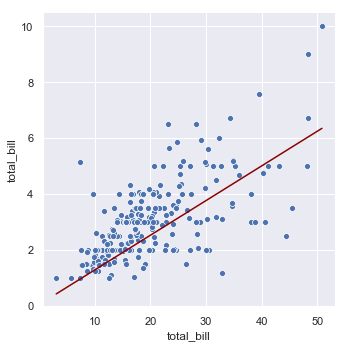

In [248]:
fit['total_bill'] = tips['total_bill']
fit['res'] = w_val * tips['total_bill'] + b_val
plt = sns.relplot(x="total_bill", y="tip", data=tips);
plt = sns.lineplot(x='total_bill', y ="res", data=fit, color="darkred");